# <div align="center"><ins>Project on Predictive Data Modeling with Portugal 2019 Election Data</ins></div>

<div align="center"><img src="docs/images/election-img.jpg" width = 100%/></div>

***
**NORKA B5, Group 3**<br>
**Team Members:** *Sruthy Surendran, Heleena Joy, Jebitta Joseph, Gopikrishna Shyam Kumar, Sreehari P S*
***

### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a combination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.<br><br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*<br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**

|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes (NOTA)|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes (Incorrect Info)|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Number of votes cast|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|Number of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Number of votes cast (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
>1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.
3. "Território Nacional" refers to portugal as a nation, not a serparate district as others. "Madeira and Açores" are Autonomous regions in Portugal

### Problem Statement
>To apply regression modelling to predict total number of MPs elected from a party under a given region.

***
### <div align="center"> Python Environment Setup </div>
***

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Basic Analysis </div>
***

In [2]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("./dataset/Portugal_Election_Data.csv")

In [3]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [4]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


***
### <div align="center"> Modeling</div>
***

In [5]:
data = pd.read_csv('./dataset/Processed_Portugal_Election_Data.csv')

In [6]:
data.head(3)

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,votersPercentage,pre.votersPercentage,Party,Mandates,validVotesPercentage,Votes,Hondt,diff_subscribedVoters,diff_totalVoters,diff_blankVotes,diff_nullVotes,FinalMandates
0,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,1.126269,-0.127891,3.217832,1.419284,14.757327,0.03196,0.021592,0.002177,0.026495,15.259962
1,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,0.799979,-0.127891,2.733495,1.211248,12.691673,0.03196,0.021592,0.002177,0.026495,11.040237
2,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,-1.484053,-0.127891,0.178549,0.112293,2.363404,0.03196,0.021592,0.002177,0.026495,2.600786


In [7]:
data.sort_values(by = 'Hondt', inplace=True)

In [8]:
X = data.drop('FinalMandates', axis =1)
y = pd.DataFrame(data['FinalMandates'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
r2_dict = dict()
def check_metrices(y_pred, model):
    print(f"Performance of {model} Model\n{'_'*50}\n")
    print(f'      MAE =  {mean_absolute_error(y_test, y_pred)}')
    print(f'      MSE =  {mean_squared_error(y_test, y_pred)}')
    r2 = r2_score(y_test, y_pred)
    r2_dict[model] = r2
    print(f' R2_Score =  {r2}')
    print(f'Max Error =  {max_error(y_test, y_pred)}')

In [11]:
def plot_prediction(preds):
    plt.scatter(X_test.Hondt, y_test.FinalMandates)
    plt.plot(X_test.Hondt, preds, 'r--')
    plt.title('Regression Plot')
    plt.xlabel('Hondt')
    plt.ylabel('FinalMandates')
    plt.show()

<div class="alert alert-success"><b>01. Linear Regression</b></div>

Performance of LinearRegression Model
__________________________________________________

      MAE =  0.02692116221091876
      MSE =  0.006914322803711327
 R2_Score =  0.9924306943074878
Max Error =  1.5376811797899457


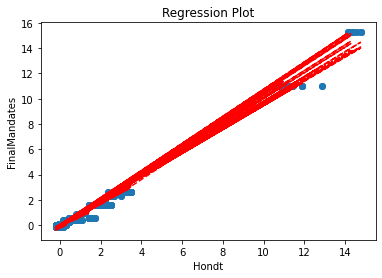

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
check_metrices(lr_pred, 'LinearRegression')
plot_prediction(lr_pred)

<div class="alert alert-success"><b>02. Random forest Regressor</b></div>

Performance of RandomForest Regressor Model
__________________________________________________

      MAE =  0.0003901571425365412
      MSE =  3.135573046991207e-05
 R2_Score =  0.9999656739906602
Max Error =  0.26191399125042214


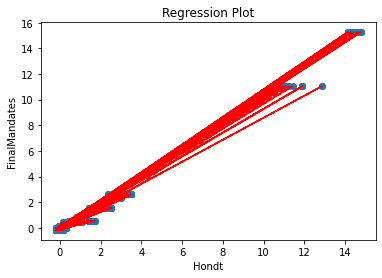

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
check_metrices(rf_pred, 'RandomForest Regressor')
plot_prediction(rf_pred)

<div class="alert alert-success"><b>03. XGBoost Regressor</b></div>

Performance of XGB Regressor Model
__________________________________________________

      MAE =  0.0007277936829123716
      MSE =  2.0490727218956733e-05
 R2_Score =  0.9999775682185248
Max Error =  0.15234710638172305


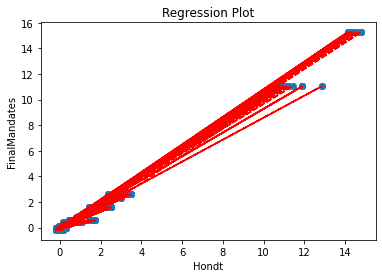

In [14]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42).fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
check_metrices(xgb_pred, 'XGB Regressor')
plot_prediction(xgb_pred)

<div class="alert alert-success"><b>04. Lasso Regressor</b></div>

Performance of Lasso Regressor Model
__________________________________________________

      MAE =  0.024073466450956687
      MSE =  0.007719544694952314
 R2_Score =  0.9915491950170823
Max Error =  1.4324801386770414


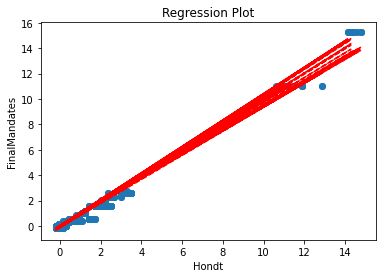

In [15]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=42, alpha = 0.01).fit(X_train, y_train) # With Alpha value = 0.01
lasso_pred = lasso_model.predict(X_test)
check_metrices(lasso_pred, 'Lasso Regressor')
plot_prediction(lasso_pred)

<div class="alert alert-success"><b>05. CatBoost Regressor</b></div>

Performance of CatBoost Regressor Model
__________________________________________________

      MAE =  0.0024204440046390508
      MSE =  6.901762623666964e-05
 R2_Score =  0.9999244444429357
Max Error =  0.3611523307236517


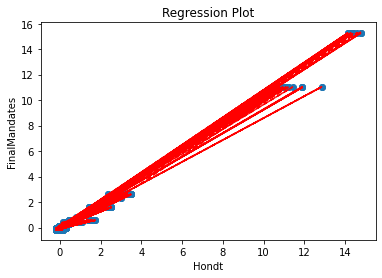

In [16]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(random_state=42, silent=True).fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
check_metrices(cat_pred, 'CatBoost Regressor')
plot_prediction(cat_pred)

<div class="alert alert-success"><b>06. SVM Regressor</b></div>

Performance of SVM Regressor Model
__________________________________________________

      MAE =  0.0750392031548659
      MSE =  0.011621678598889778
 R2_Score =  0.9872774181257625
Max Error =  1.838747571503058


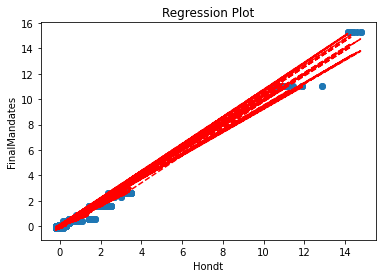

In [17]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear').fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
check_metrices(svm_pred, 'SVM Regressor')
plot_prediction(svm_pred)

In [18]:
r2_dict

{'LinearRegression': 0.9924306943074878,
 'RandomForest Regressor': 0.9999656739906602,
 'XGB Regressor': 0.9999775682185248,
 'Lasso Regressor': 0.9915491950170823,
 'CatBoost Regressor': 0.9999244444429357,
 'SVM Regressor': 0.9872774181257625}

In [19]:
best_model = max(r2_dict, key = r2_dict.get)

In [20]:
print(f'Best model is {best_model} with R2_Score of {r2_dict.get(best_model)}')

Best model is XGB Regressor with R2_Score of 0.9999775682185248


#### **Conclusion**
All the 6 models perform well, but it is XGB Regressor that has best performance.

***
### <div align="center"> Hyperparameter Tuning</div>
***